# Спрос на рейсы авиакомпании

Для авиакомпании, выполняющая внутренние пассажирские перевозки, необхадимо понять предпочтения пользователей, покупающих билеты на разные направления.

Целью проекта является изучение базы данных и анализ спроса пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

В налиичии файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **Импорт данных**

In [2]:
def data_read(file):
    """
        Функция принемает путь к файлу, выводить на экран 10 сторк таблицы,
        информацию о столбцах, число дубликатов и возврашет таблицу типа DataFrame
    """
    data = pd.read_csv(file)
    display(data.head(10))
    display(data.describe())
    data.info(memory_usage='deep')
    return data

In [3]:
df1 = data_read('/datasets/query_1.csv')

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 775.0 bytes


Ошибок данных в первом запросе не выявлено.

In [4]:
df2 = data_read('/datasets/query_3.csv')

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.7 KB


Значения во втором запросе столбца average_flights имеют дробную часть, следовательно, необходимо перевести данный столбец к целочисленному типу данных. Также в задачах проекта требуется общее число рейсов, поэтому на основе среднего числа рейсов найдем общее.

In [5]:
df2['average_flights'] = df2['average_flights'].astype('int')
df2['flights_amount'] = df2['average_flights'] * 30

**Вывод:**

В данном пункте были импортированы и изучены данные. В второй таблице тип данных среднего числа полетов в день записан в float, что не соответствует по смыслу столба. Для данной таблицы тип данных переведен в int, а также посчитано общее число полетов для каждого города.

* **Топ-10 городов по количеству рейсов**

In [6]:
df2 = df2.sort_values(by = ['average_flights'], ascending = False).reset_index(drop=True)
df2.head(10)

,city,average_flights,flights_amount
0,Москва,129,3870
1,Санкт-Петербург,31,930
2,Новосибирск,17,510
3,Екатеринбург,11,330
4,Красноярск,11,330
5,Пермь,10,300
6,Ростов-на-Дону,10,300
7,Брянск,10,300
8,Ульяновск,9,270
9,Советский,9,270


* **Графики распределения количества рейсов от модели самолетов городов**

In [7]:
def bar_plot(data, x, y, l, w, tittle, ylabel):
    plt.figure(figsize=(l,w))
    plt.grid()
    sns.barplot(x = x, y = y, data = data)
    plt.suptitle(tittle, fontsize=18)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel('Количество рейсов', fontsize=14)

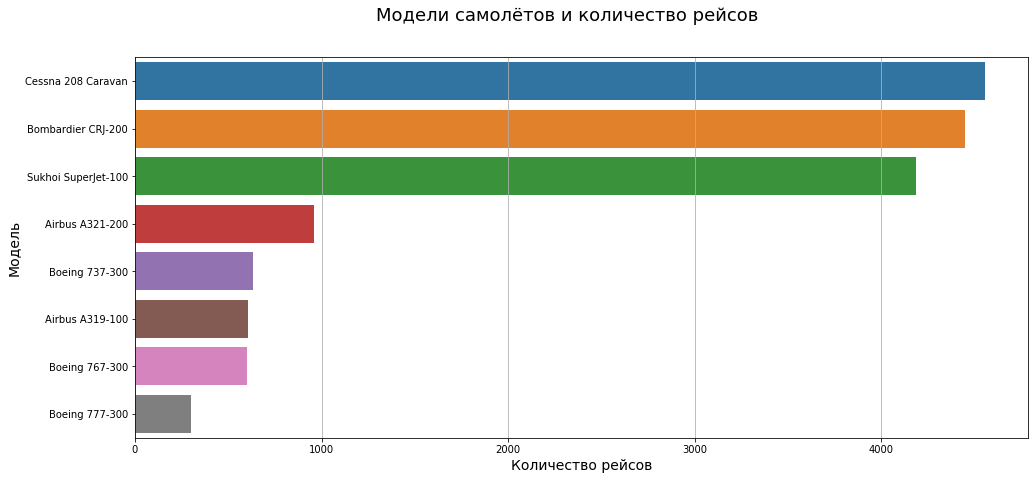

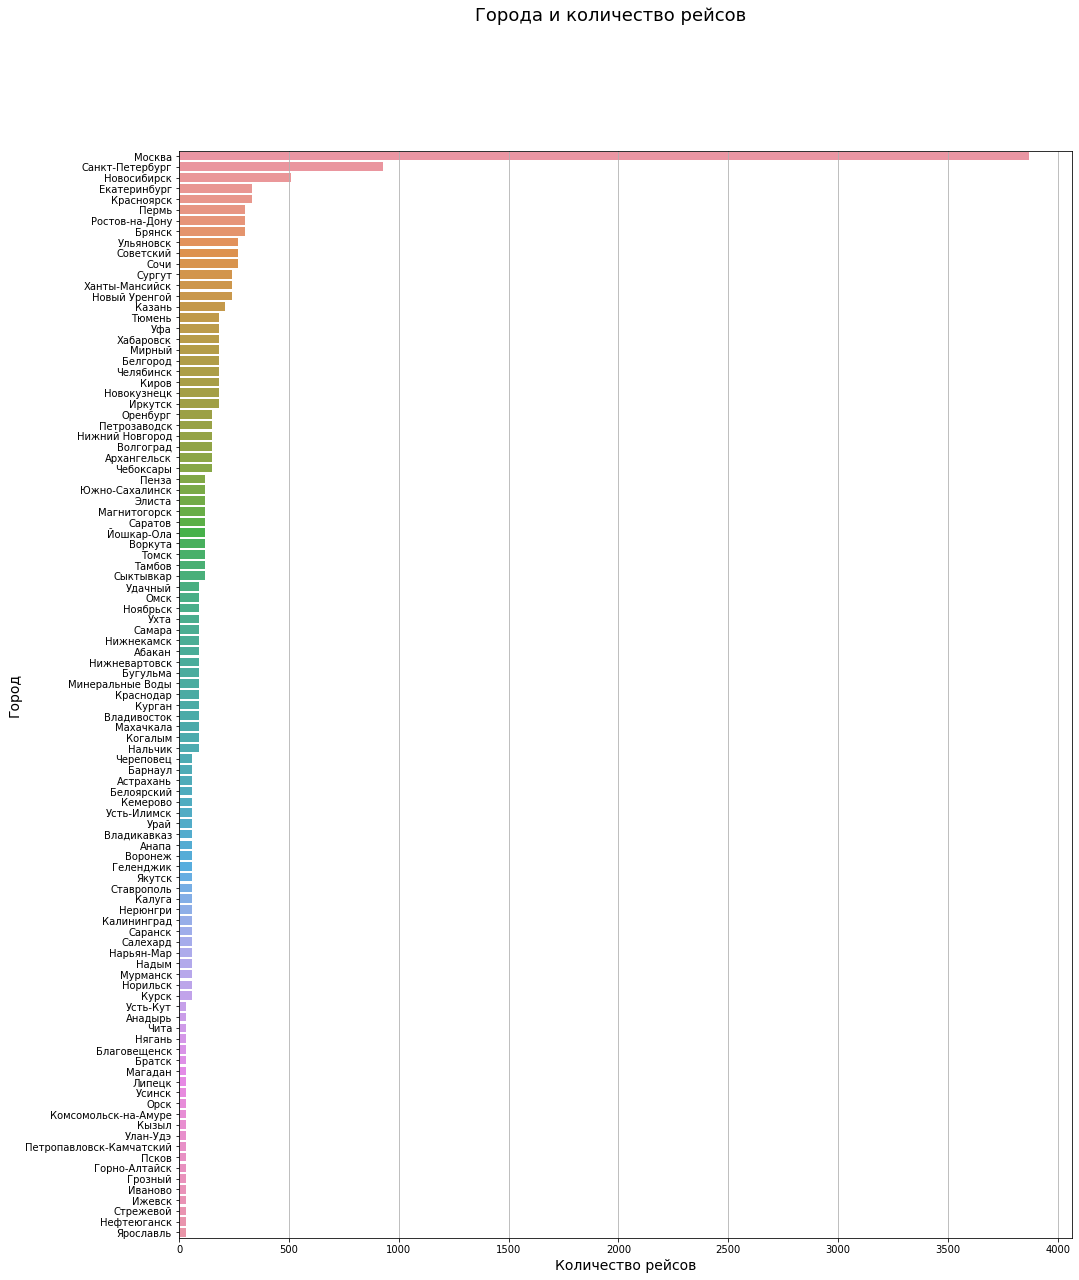

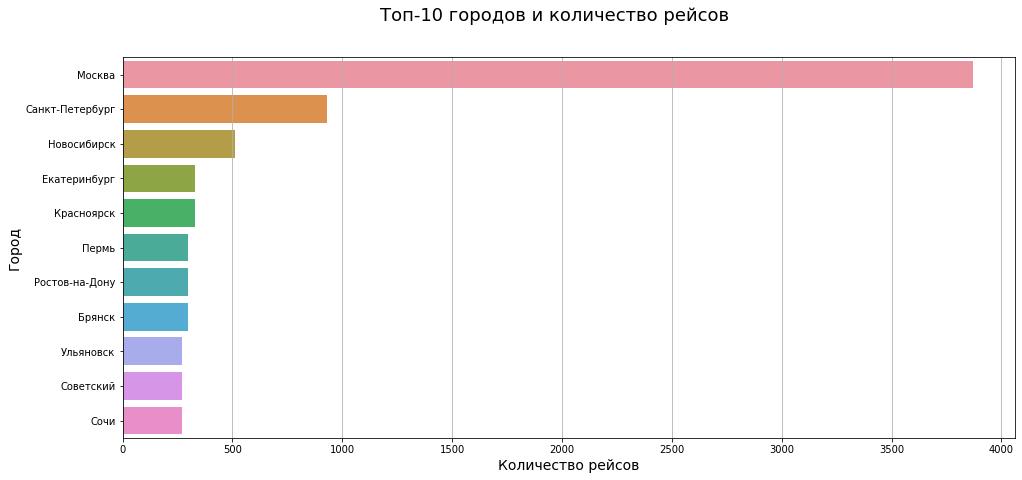

In [8]:
df2_top10 = df2.loc[:10,:]
df1 = df1.sort_values(by = 'flights_amount', ascending=False)
bar_plot(df1, df1['flights_amount'], df1['model'], 16,7, 'Модели самолётов и количество рейсов', 'Модель')
bar_plot(df2, df2['flights_amount'], df2['city'], 16,20, 'Города и количество рейсов', 'Город')
bar_plot(df2_top10, df2_top10['flights_amount'], df2_top10['city'], 16,7, 'Топ-10 городов и количество рейсов', 'Город')

1) По графику модели самолётов и количества рейсов видно, что наиболее часто используемыми самолетами являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, которые являются малогабаритными и используется в региональной авиации;

2) График городов и количества рейсов показывает, что Москва значительно выделяется по числу полетов на фоне остальных;

3) В первой десятке городов, кроме Москвы и Санкт-Петербурга, также  расположились города – миллионники, промышленные центры и туристические районы.

## Общие выводы

В ходе выполнения проекта аналитика в авиакомпании были произведены импортирование данных, изменение типов данных, выбраны ТОП-10 городов с наибольшим числом перелётов, построены графики распределения количества рейсов от модели самолета, городов и ТОП-10 городов. 

На основе данных выявлены следующие особенности:

* Популярными моделями самолетов являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, которые являются малогабаритными и используется в региональной авиации;

* Москва значительно выделяется по числу полетов на фоне остальных городов;

* В первой десятке городов, кроме Москвы и Санкт-Петербурга, также расположились города – миллионники, промышленные центры и туристические районы.